In [75]:
import pandas as pd
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as ss
from sklearn.preprocessing import MinMaxScaler


In [76]:
#Input data
df = pd.read_excel("Data_sales2022-24.xlsx")
display(df)

,order_number,total_pricettc,creation_date,delivery,quantity,totalttc_ligne,client_inst,store,payment_mode,order_source,city,Ligne synthèse,client_number
0,2331079,46.5,2022-01-01,dm_economy,1.0,46.5,0,CTCP OLF,pm_bill,mobile,Estavayer le Lac,1,733001
1,2331080,60.6,2022-01-01,dm_economy,1.0,28.8,0,CTCP OLF,pm_bill,www,Gorgier,0,698205
2,2331080,60.6,2022-01-01,dm_economy,1.0,31.8,0,CTCP OLF,pm_bill,www,Gorgier,1,698205
3,2331081,13.1,2022-01-01,dm_economy,1.0,13.1,0,CTCP OLF,pm_bill,mobile,Neuchâtel,1,362003
4,2331082,38.4,2022-01-01,dm_priority,1.0,29.4,0,CTCP OLF,pm_bill,mobile,Chigny,1,613851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893437,2749744,34.1,2024-03-25,dm_economy,1.0,34.1,0,CTCP OLF,pm_bill,mobile,Genève,1,356791
893438,2749745,21.3,2024-03-25,dm_shop,1.0,21.3,0,Lausanne Pépinet,pm_payInShop,www,Vallorbe,1,836651
893439,2749746,38.0,2024-03-25,dm_economy,1.0,19.0,0,Lausanne Pépinet,pm_creditcard,www,Le Bry,0,546323
893440,2749746,38.0,2024-03-25,dm_economy,1.0,10.0,0,Lausanne Pépinet,pm_creditcard,www,Le Bry,0,546323


/var/folders/fl/rm_vjrmx2wbc9bzm_ht_0sl80000gn/T/ipykernel_36544/1631959490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['creation_date'] = pd.to_datetime(sales_df['creation_date'])


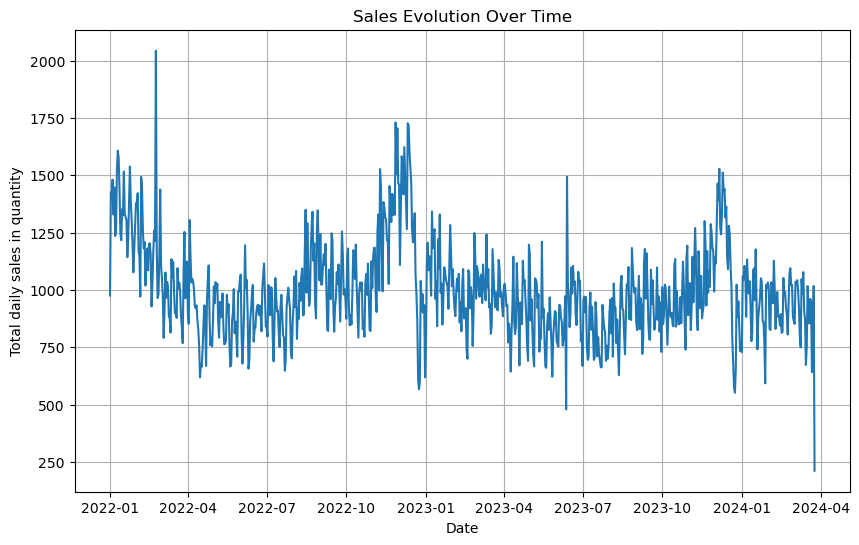

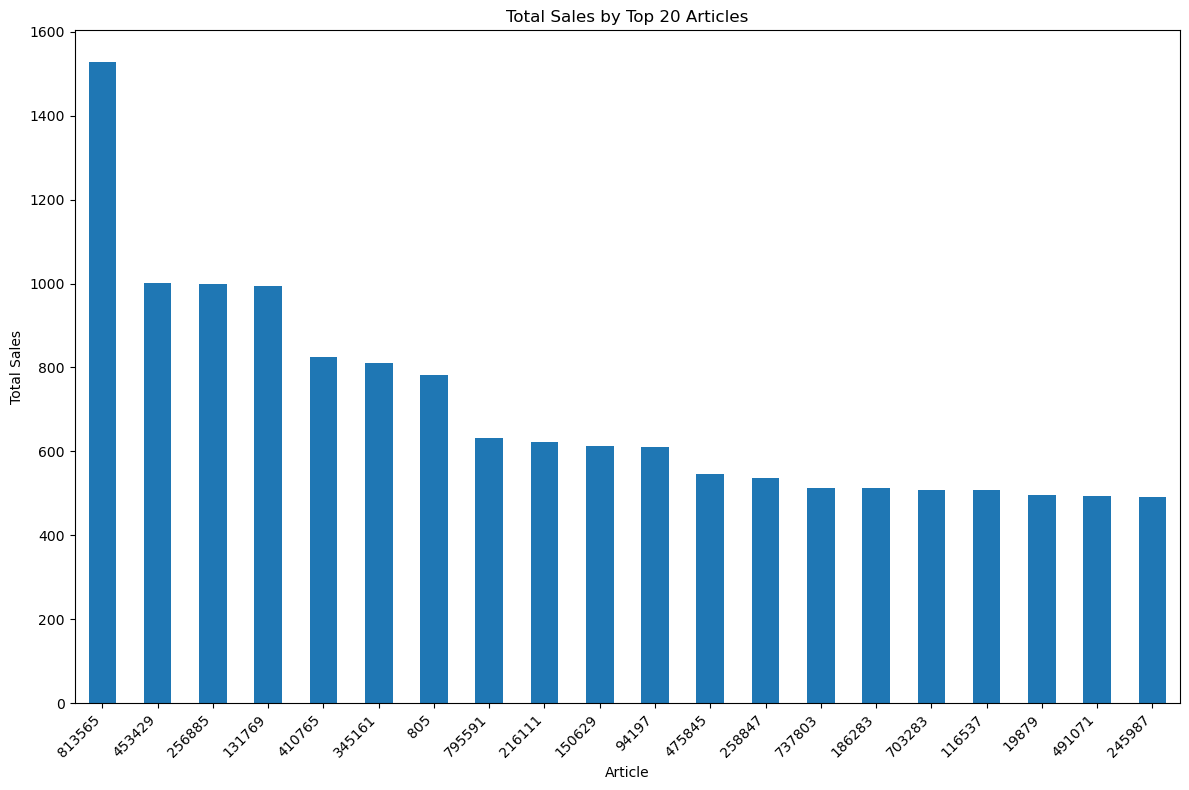

In [3]:
#Remove all lines for company orders and keep only private client
df = df[df['client_inst'] == 0]


sales_df = df[['quantity', 'creation_date', 'client_number']]
# Ensure the 'Date' column is in datetime format
sales_df['creation_date'] = pd.to_datetime(sales_df['creation_date'])


# Group by date and sum the sales
sales_by_date = sales_df.groupby('creation_date')['quantity'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sales_by_date.index, sales_by_date.values, linestyle='-')
plt.title('Sales Evolution Over Time')
plt.xlabel('Date')
plt.ylabel('Total daily sales in quantity')
plt.grid(True)
plt.show()

# Group by 'client number' and sum the sales
sales_by_article = sales_df.groupby('client_number')['quantity'].sum()

# Select the top 20 articles based on total sales
top_20_articles = sales_by_article.nlargest(20)

# Filter the sales data to keep only the top 20 articles
top_20_sales = sales_by_article[sales_by_article.index.isin(top_20_articles.index)]

# Sort the top 20 articles by sales in decreasing order
top_20_sales = top_20_sales.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
top_20_sales.plot(kind='bar')
plt.title('Total Sales by Top 20 Articles')
plt.xlabel('Article')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

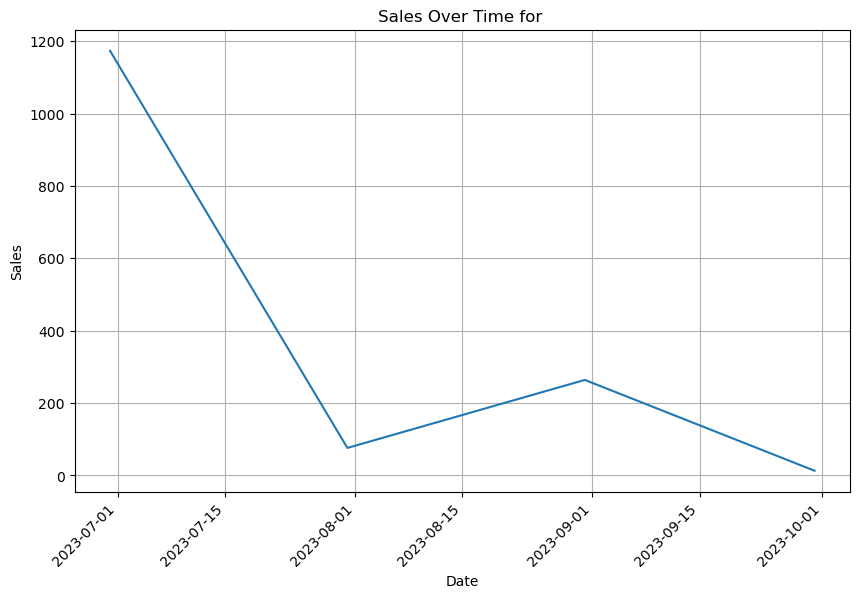

In [4]:
sales_df = df[['quantity', 'creation_date', 'client_number']]

book_sales = sales_df[sales_df['client_number'] == 813565]

#sales_by_date = sales_df.groupby('creation_date')['quantity'].sum()
grouped_data = book_sales.groupby(pd.Grouper(key='creation_date', freq='M'))['quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(grouped_data['creation_date'], grouped_data['quantity'], linestyle='-')
plt.title("Sales Over Time for ")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

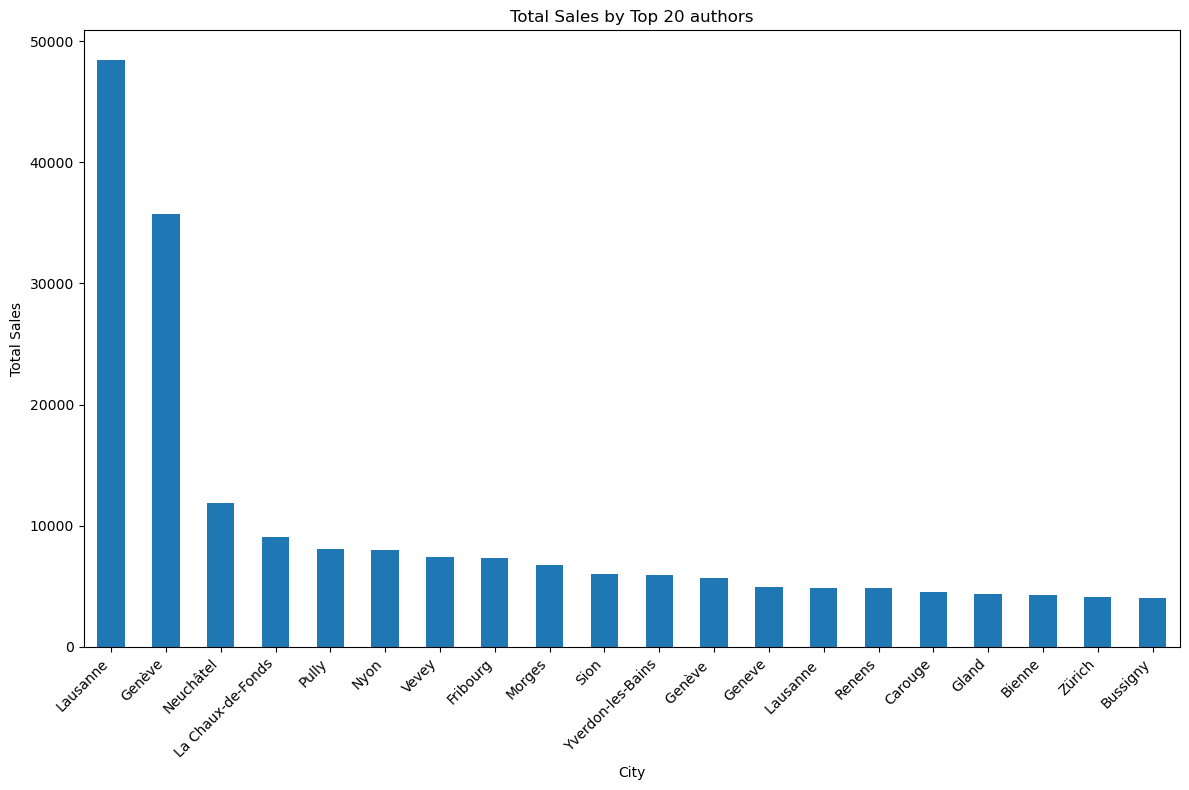

In [5]:
#Top 20 sales by city

author_df = df[['quantity', 'creation_date', 'city']]

# Group by 'Article' and sum the sales
sales_by_author = author_df.groupby('city')['quantity'].sum()

# Select the top 20 articles based on total sales
top_20_author = sales_by_author.nlargest(20)

# Filter the sales data to keep only the top 20 articles
top_20_author = sales_by_author[sales_by_author.index.isin(top_20_author.index)]

# Sort the top 20 articles by sales in decreasing order
top_20_author = top_20_author.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
top_20_author.plot(kind='bar')
plt.title('Total Sales by Top 20 authors')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


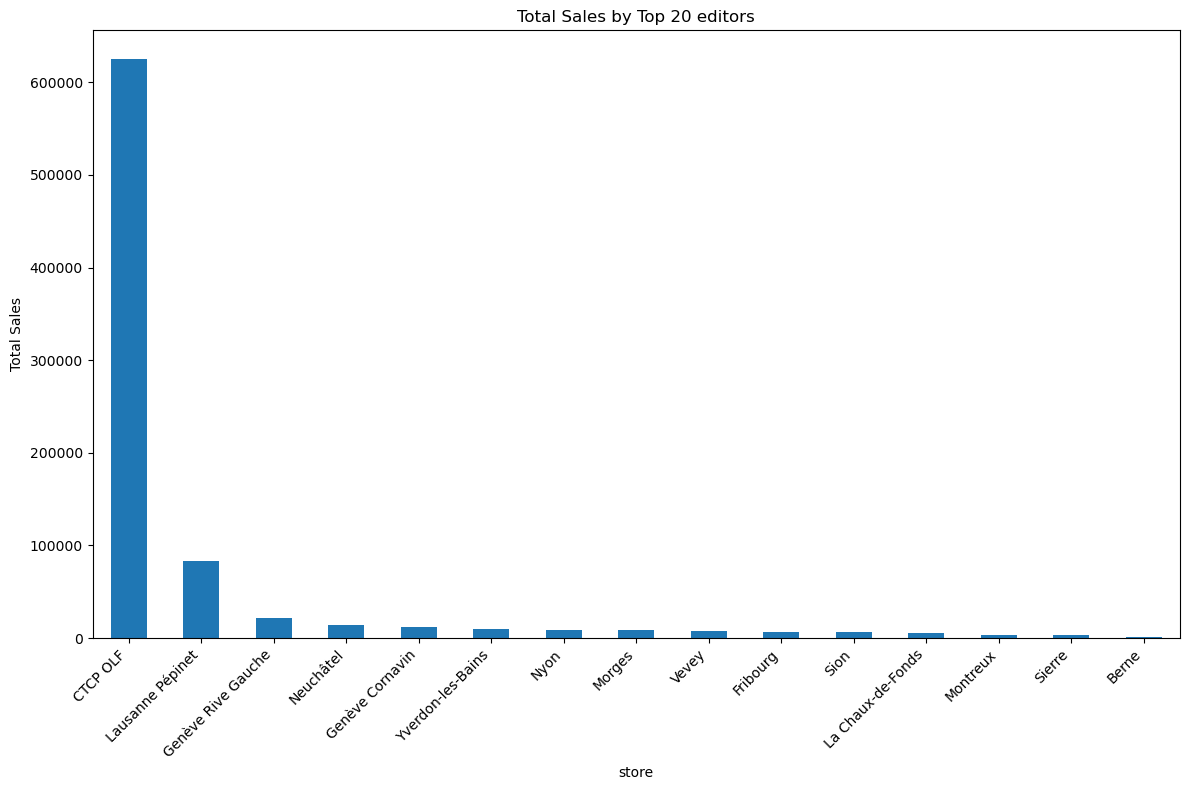

In [6]:
#Top 20 sales by stores (CTCP OLF = poste delivery, other = pick up at a shop)

editor_df = df[['quantity', 'creation_date', 'store']]

# Group by 'Article' and sum the sales
sales_by_editor = editor_df.groupby('store')['quantity'].sum()

# Select the top 20 articles based on total sales
top_20_editor = sales_by_editor.nlargest(20)

# Filter the sales data to keep only the top 20 articles
top_20_editor = sales_by_editor[sales_by_editor.index.isin(top_20_editor.index)]

# Sort the top 20 articles by sales in decreasing order
top_20_editor = top_20_editor.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8)) 
top_20_editor.plot(kind='bar')
plt.title('Total Sales by Top 20 editors')
plt.xlabel('store')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/fl/rm_vjrmx2wbc9bzm_ht_0sl80000gn/T/ipykernel_36544/2075878864.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['unit_price'] = book_df['totalttc_ligne']/book_df['quantity']
/var/folders/fl/rm_vjrmx2wbc9bzm_ht_0sl80000gn/T/ipykernel_36544/2075878864.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  web_book_df.replace([np.inf, -np.inf], 0, inplace=True)
/var/folders/fl/rm_vjrmx2wbc9bzm_ht_0sl80000gn/T/ipykernel_36544/2075878864.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

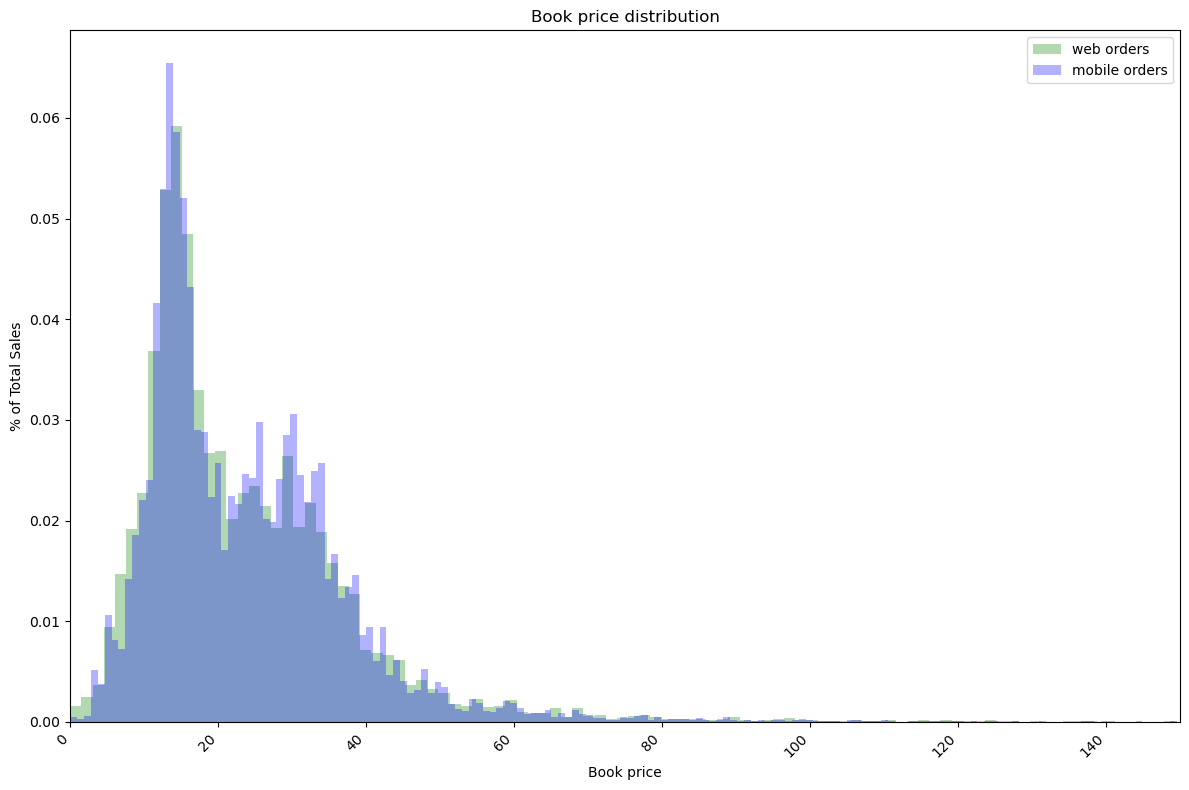

In [7]:
#Book price distribution

book_df = df[['quantity', 'creation_date', 'totalttc_ligne', 'order_source']]
book_df['unit_price'] = book_df['totalttc_ligne']/book_df['quantity']
web_book_df = book_df[book_df['order_source'] == 'www']
mobile_book_df = book_df[book_df['order_source'] == 'mobile']

web_book_df.replace([np.inf, -np.inf], 0, inplace=True)
mobile_book_df.replace([np.inf, -np.inf], 0, inplace=True)

# Plotting
plt.figure(figsize=(12, 8)) 
plt.hist(web_book_df['unit_price'], density=True, bins =1000, color = 'green', alpha = 0.3, label = 'web orders')
plt.hist(mobile_book_df['unit_price'], density=True, bins =1000, color = 'blue', alpha = 0.3, label = 'mobile orders')
plt.title('Book price distribution')
plt.xlabel('Book price')
plt.ylabel('% of Total Sales')
plt.xticks(rotation=45, ha='right')
plt.xlim(0,150)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

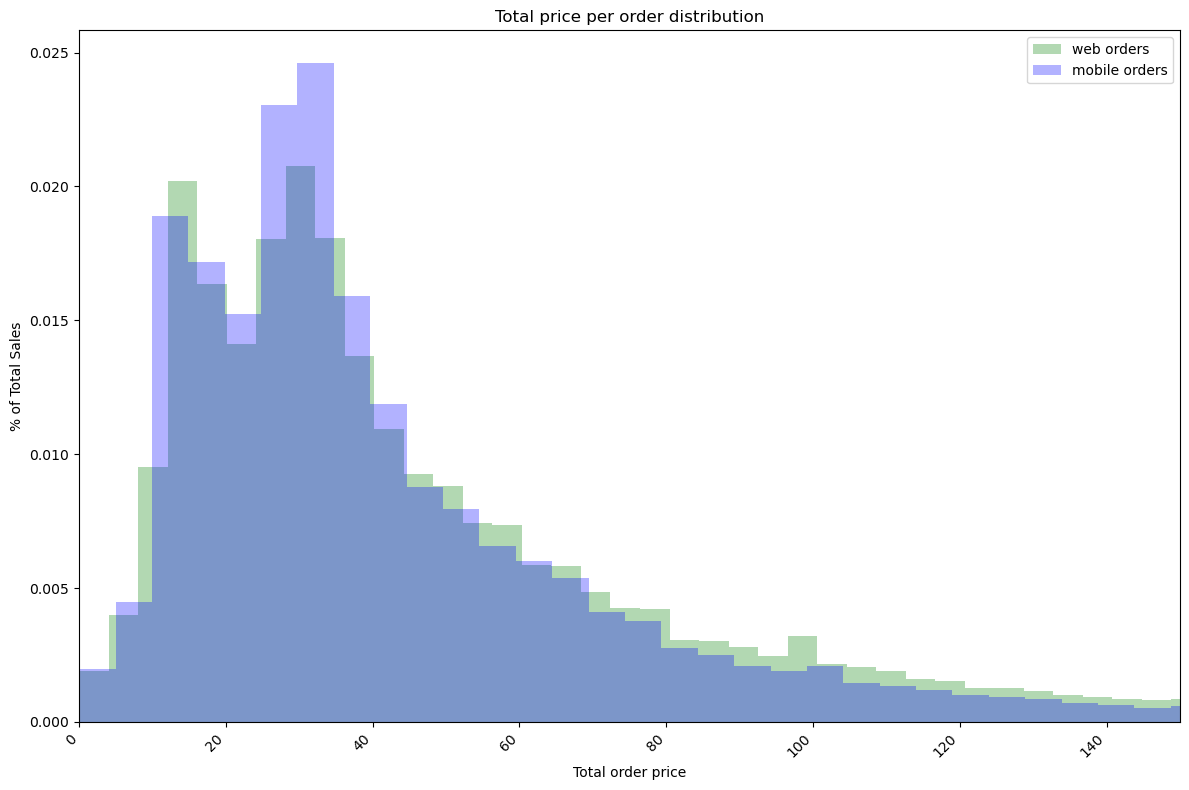

In [8]:
#Order total price distribution

orders_df = df[['quantity', 'creation_date', 'total_pricettc', 'order_source', 'Ligne synthèse']]
#We keep only the synthesis line (=first line of an order) otherwise order with different book will count more than one in the stats
orders_df = orders_df[orders_df['Ligne synthèse'] == 1]
web_order_df = orders_df[orders_df['order_source'] == 'www']
mobile_order_df = orders_df[orders_df['order_source'] == 'mobile']

# Plotting
plt.figure(figsize=(12, 8)) 
plt.hist(web_order_df['total_pricettc'], density=True, bins =1000, color = 'green', alpha = 0.3, label = 'web orders')
plt.hist(mobile_order_df['total_pricettc'], density=True, bins =1000, color = 'blue', alpha = 0.3, label = 'mobile orders')
plt.title('Total price per order distribution')
plt.xlabel('Total order price')
plt.ylabel('% of Total Sales')
plt.xticks(rotation=45, ha='right')
plt.xlim(0,150)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [48]:
#Features that will be used for K-means clustering method
df_features_overall = df[df['Ligne synthèse'] == 1]
df_features_overall = df_features_overall[['client_number', 'quantity', 'store', 'payment_mode', 'order_source', 'city', 'order_number', 'total_pricettc']]
df_features_overall['store'] = df_features_overall.store.astype('category')

print(df_features_overall.head())

   client_number  quantity     store payment_mode order_source  \
0         733001       1.0  CTCP OLF      pm_bill       mobile   
2         698205       1.0  CTCP OLF      pm_bill          www   
3         362003       1.0  CTCP OLF      pm_bill       mobile   
4         613851       1.0  CTCP OLF      pm_bill       mobile   
6         513781       1.0  CTCP OLF      pm_bill       mobile   

                  city  order_number  total_pricettc  
0     Estavayer le Lac       2331079            46.5  
2              Gorgier       2331080            60.6  
3            Neuchâtel       2331081            13.1  
4               Chigny       2331082            38.4  
6  Arvillard (Salins)        2331083            73.0  


In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('quantity ~ C(store) + C(order_source) + C(payment_mode)', data=df_features_overall).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                        sum_sq        df          F        PR(>F)
C(store)             14.548690      14.0   2.302284  3.713684e-03
C(order_source)      84.893440       3.0  62.692538  1.623623e-40
C(payment_mode)       7.413442       7.0   2.346307  2.151340e-02
Residual         178235.604054  394873.0        NaN           NaN


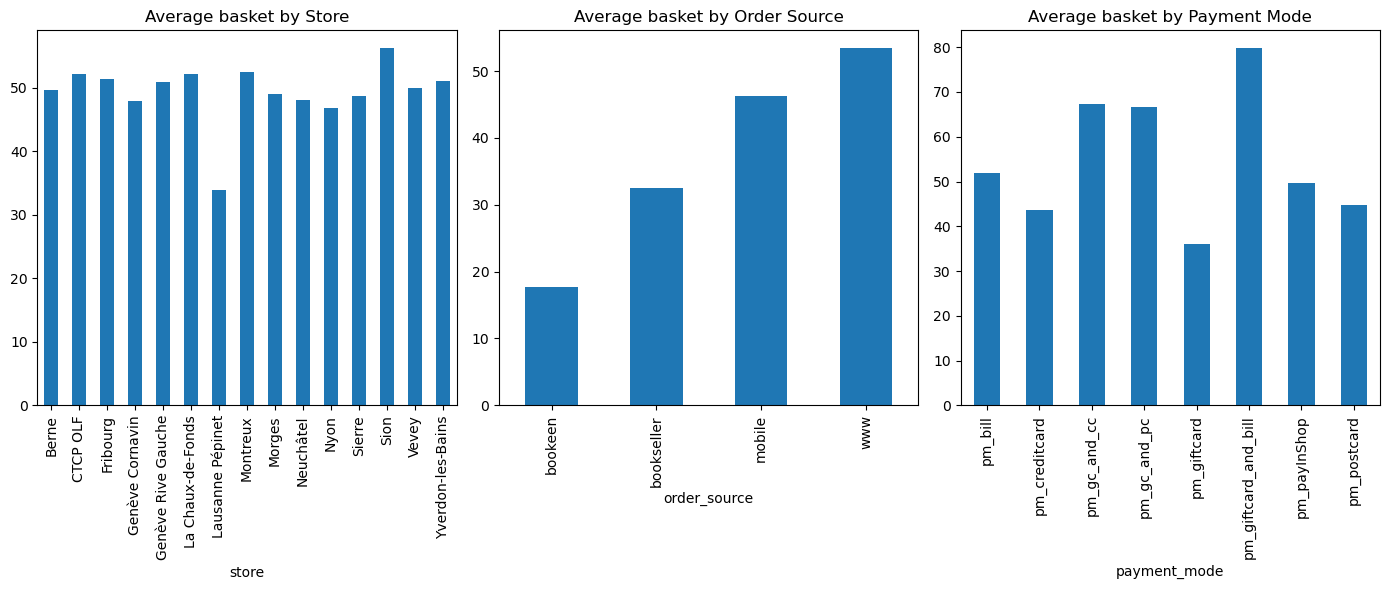

In [55]:
#Average order price

plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
df_features_overall.groupby('store')['total_pricettc'].mean().plot(kind='bar', title='Average basket by Store')

plt.subplot(1, 3, 2)
df_features_overall.groupby('order_source')['total_pricettc'].mean().plot(kind='bar', title='Average basket by Order Source')

plt.subplot(1, 3, 3)
df_features_overall.groupby('payment_mode')['total_pricettc'].mean().plot(kind='bar', title='Average basket by Payment Mode')

plt.tight_layout()
plt.show()

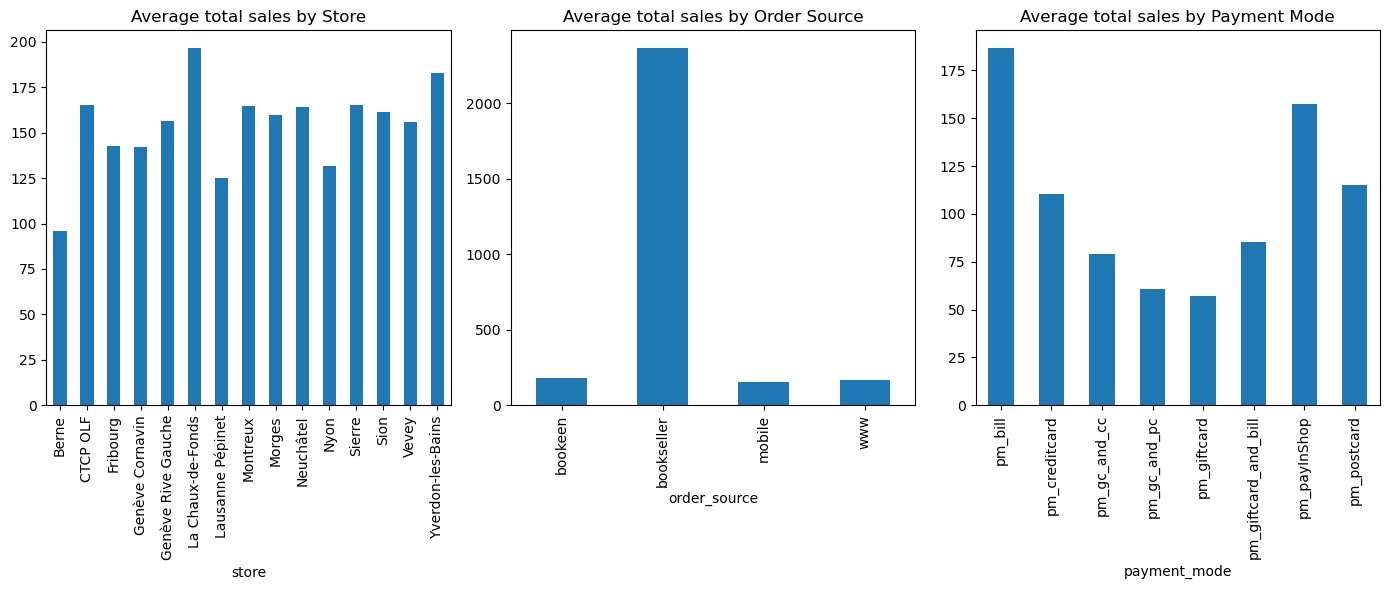

In [56]:
#Average total sales per client
#Aggregate totalttc_ligne by client_number
df_aggregated = df_features_overall.groupby('client_number').agg({
    'total_pricettc': 'sum',
    'store': 'first',  #assuming each client has a dominant store, same for payment_mode and order_source
    'payment_mode': 'first',
    'order_source': 'first'
}).reset_index()

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
df_aggregated.groupby('store')['total_pricettc'].mean().plot(kind='bar', title='Average total sales by Store')

plt.subplot(1, 3, 2)
df_aggregated.groupby('order_source')['total_pricettc'].mean().plot(kind='bar', title='Average total sales by Order Source')

plt.subplot(1, 3, 3)
df_aggregated.groupby('payment_mode')['total_pricettc'].mean().plot(kind='bar', title='Average total sales by Payment Mode')

plt.tight_layout()
plt.show()

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

df_regr = df_aggregated[['total_pricettc', 'store', 'order_source', 'payment_mode']]
# Encode categorical variables
X = pd.get_dummies(df_regr, prefix=['store', 'order_source', 'payment_mode'], columns=['store', 'order_source', 'payment_mode'])
X = X.dropna()
y = X['total_pricettc']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                                    Coefficient
total_pricettc                     1.000000e+00
store_Berne                        1.425844e-15
store_CTCP OLF                     2.092595e-16
store_Fribourg                    -2.023745e-16
store_Genève Cornavin             -2.716754e-16
store_Genève Rive Gauche           8.620726e-17
store_La Chaux-de-Fonds            1.852787e-16
store_Lausanne Pépinet             4.181103e-17
store_Montreux                    -5.556748e-16
store_Morges                       1.209235e-16
store_Neuchâtel                   -1.801293e-16
store_Nyon                         2.207853e-16
store_Sierre                       1.073022e-15
store_Sion                         1.716702e-16
store_Vevey                       -1.881761e-16
store_Yverdon-les-Bains           -2.136771e-15
order_source_bookeen               1.362600e-16
order_source_bookseller           -5.020101e-16
order_source_mobile                1.083484e-15
order_source_www                  -7.177

KeyError: 1

In [70]:
# Initialize and fit the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                              Feature    Importance
24                           quantity  9.983647e-01
3            store_Genève Rive Gauche  7.022169e-04
0                      store_CTCP OLF  3.551346e-04
22          payment_mode_pm_payInShop  2.216652e-04
15                order_source_mobile  1.954682e-04
16                   order_source_www  1.562274e-04
4             store_La Chaux-de-Fonds  1.925853e-06
2               store_Genève Cornavin  9.875324e-07
5              store_Lausanne Pépinet  5.758820e-07
17         payment_mode_pm_creditcard  4.378741e-07
11                         store_Sion  2.921536e-07
14            order_source_bookseller  1.832471e-07
23           payment_mode_pm_postcard  7.584598e-08
13            store_Yverdon-les-Bains  4.578964e-08
1                      store_Fribourg  1.967899e-08
6                      store_Montreux  1.609903e-08
10                       store_Sierre  0.000000e+00
9                          store_Nyon  0.000000e+00
8           

In [80]:
from sklearn.impute import SimpleImputer


# Aggregate quantity by client_number
df_aggregated = df_features_overall.groupby('client_number').agg({
    'quantity': 'sum',
    'store': 'first',  # assuming each client has a dominant store, or use a different aggregation if needed
    'payment_mode': 'first',
    'order_source': 'first',
    'total_pricettc': 'sum'
}).reset_index()

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df_aggregated['store'] = imputer.fit_transform(df_aggregated[['store']])
df_aggregated['payment_mode'] = imputer.fit_transform(df_aggregated[['payment_mode']])
df_aggregated['order_source'] = imputer.fit_transform(df_aggregated[['order_source']])

# Encode categorical variables
df_encoded = pd.get_dummies(df_aggregated[['store', 'order_source', 'payment_mode']], drop_first=True)
X = pd.concat([df_encoded, df_aggregated[['total_pricettc']]], axis=1)
y = df_aggregated['total_pricettc']
display(X)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

,store_CTCP OLF,store_Fribourg,store_Genève Cornavin,store_Genève Rive Gauche,store_La Chaux-de-Fonds,store_Lausanne Pépinet,store_Montreux,store_Morges,store_Neuchâtel,store_Nyon,...,order_source_mobile,order_source_www,payment_mode_pm_creditcard,payment_mode_pm_gc_and_cc,payment_mode_pm_gc_and_pc,payment_mode_pm_giftcard,payment_mode_pm_giftcard_and_bill,payment_mode_pm_payInShop,payment_mode_pm_postcard,total_pricettc
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,87.80
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,689.95
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,23.00
3,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,3445.80
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,543.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123385,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,7.00
123386,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,18.10
123387,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,11.00
123388,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,19.90


                              Feature    Importance
24                     total_pricettc  9.976927e-01
0                      store_CTCP OLF  6.660983e-04
22          payment_mode_pm_payInShop  5.935029e-04
16                   order_source_www  5.894252e-04
3            store_Genève Rive Gauche  2.680598e-04
15                order_source_mobile  1.771411e-04
11                         store_Sion  8.934067e-06
4             store_La Chaux-de-Fonds  1.263610e-06
12                        store_Vevey  1.108856e-06
1                      store_Fribourg  7.413498e-07
13            store_Yverdon-les-Bains  4.679077e-07
17         payment_mode_pm_creditcard  2.926554e-07
5              store_Lausanne Pépinet  1.867992e-07
14            order_source_bookseller  4.749712e-08
23           payment_mode_pm_postcard  1.543798e-08
8                     store_Neuchâtel  1.300818e-08
2               store_Genève Cornavin  1.036305e-08
7                        store_Morges  1.223453e-09
10          

                                   store_CTCP OLF  store_Fribourg  \
store_CTCP OLF                           1.000000       -0.171778   
store_Fribourg                          -0.171778        1.000000   
store_Genève Cornavin                   -0.228514       -0.012196   
store_Genève Rive Gauche                -0.311892       -0.016647   
store_La Chaux-de-Fonds                 -0.137922       -0.007361   
store_Lausanne Pépinet                  -0.608902       -0.032499   
store_Montreux                          -0.102694       -0.005481   
store_Morges                            -0.181195       -0.009671   
store_Neuchâtel                         -0.232373       -0.012402   
store_Nyon                              -0.200554       -0.010704   
store_Sierre                            -0.095820       -0.005114   
store_Sion                              -0.155490       -0.008299   
store_Vevey                             -0.173625       -0.009267   
store_Yverdon-les-Bains           

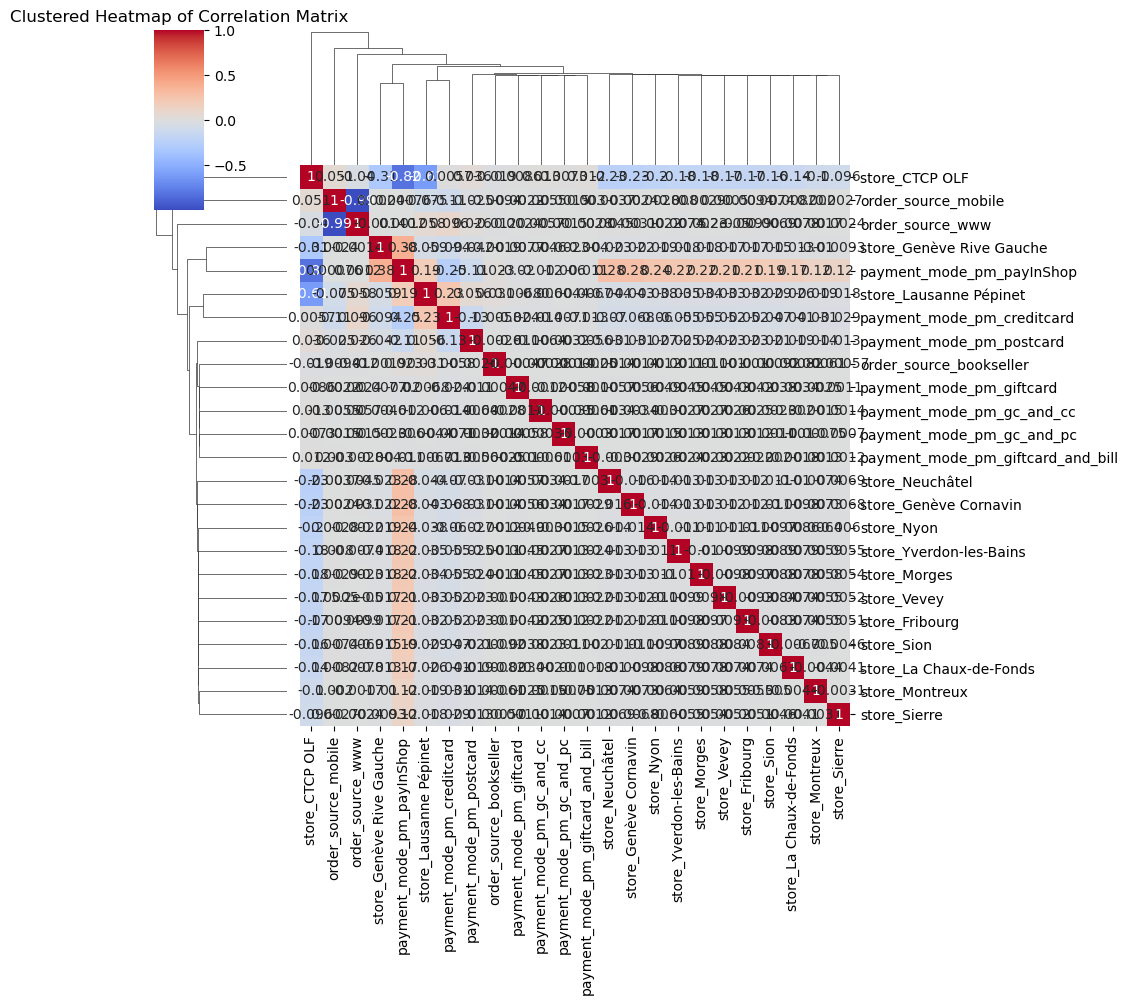

In [79]:
filtered_df = df_features_overall[['quantity', 'store', 'payment_mode', 'order_source', 'city', 'order_number', 'total_pricettc']]

correlation_matrix = df_encoded.corr()
print(correlation_matrix)
import seaborn as sns
# Generate a clustermap
sns.clustermap(correlation_matrix, cmap="coolwarm", annot=True)

plt.title('Clustered Heatmap of Correlation Matrix')
plt.show()